In [2]:
import pandas as pd
import librosa
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./audio_features.csv', index_col=0)
pitch_df = pd.read_csv('./audio_pitch_fixed.csv', index_col=0)

In [4]:
df['pitch'] = pitch_df['pitch']
df['intonation'] = pitch_df['intonation']

In [10]:
def get_duration(row):
    return librosa.get_duration(filename=row['filename'], sr=48000)

df['duration'] = df.apply(get_duration, axis=1)

In [6]:
final_df = df[(df.f1_diff != -1000) | (df.f2_diff != -1000)]
final_df = final_df.dropna()

In [7]:
final_df.gender.value_counts()

female    2566
male      2545
Name: gender, dtype: int64

In [8]:
# final_df.to_csv('./audio_features_final.csv')

In [9]:
final_group = final_df.groupby('gender')
final_sampled = final_group.apply(lambda x: x.sample(final_group.size().min()).reset_index(drop=True))
final_df = final_sampled.reset_index(0, drop=True).reset_index()

In [185]:
final_df.drop(['index'], axis=1).to_csv('./audio_features_final.csv')

In [10]:
male_df = final_df[final_df.gender == 'male']
female_df = final_df[final_df.gender == 'female']

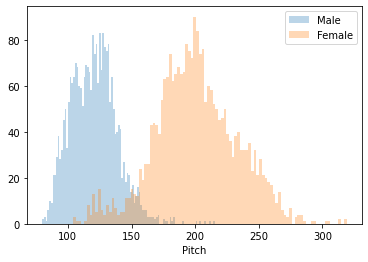

In [11]:
plt.hist(male_df.pitch, bins=100, alpha=0.3, label='Male')
plt.hist(female_df.pitch, bins=100, alpha=0.3, label='Female')
plt.legend()
plt.xlabel('Pitch')
plt.show()

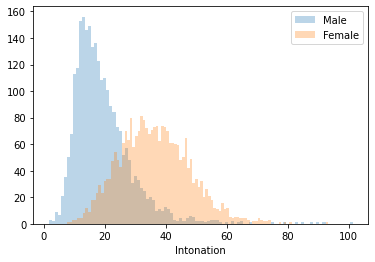

In [12]:
plt.hist(male_df.intonation, bins=100, alpha=0.3, label='Male')
plt.hist(female_df.intonation, bins=100, alpha=0.3, label='Female')
plt.legend()
plt.xlabel('Intonation')
plt.show()

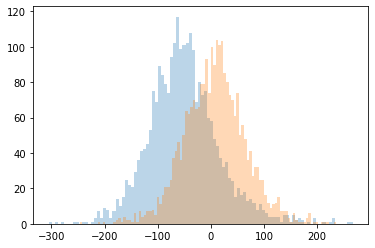

In [13]:
plt.hist(male_df.f1_diff, bins=100, alpha=0.3)
plt.hist(female_df.f1_diff, bins=100, alpha=0.3)
plt.show()

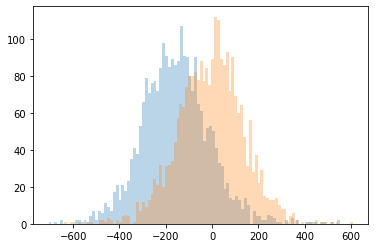

In [14]:
plt.hist(male_df.f2_diff, bins=100, alpha=0.3)
plt.hist(female_df.f2_diff, bins=100, alpha=0.3)
plt.show()

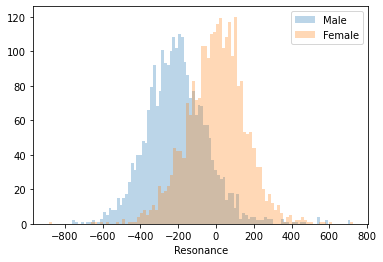

In [15]:

plt.hist(male_df.f1_diff + male_df.f2_diff, bins=100, alpha=0.3, label='Male')
plt.hist(female_df.f1_diff + female_df.f2_diff, bins=100, alpha=0.3, label='Female')
plt.legend()
plt.xlabel('Resonance')
plt.show()

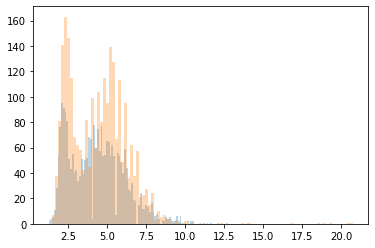

In [23]:

plt.hist(male_df.duration, bins=100, alpha=0.3)
plt.hist(female_df.duration, bins=100, alpha=0.3)
plt.show()

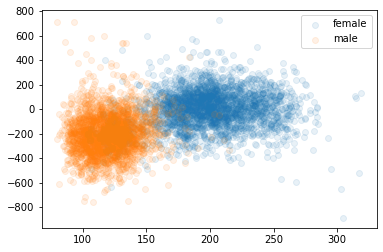

In [21]:
plt.scatter(female_df.pitch, female_df.f1_diff + female_df.f2_diff, alpha=0.1, label='female')
plt.scatter(male_df.pitch, male_df.f1_diff + male_df.f2_diff, alpha=0.1, label='male')
plt.legend()
# plt.hist(mdf.intonation, bins=100, alpha=0.3)
# plt.hist(fdf.intonation, bins=100, alpha=0.3)
plt.show()

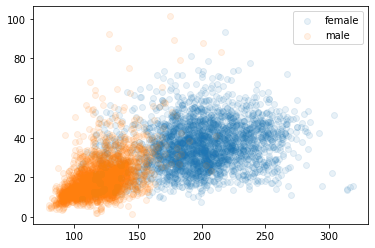

In [22]:

plt.scatter(female_df.pitch, female_df.intonation, alpha=0.1, label='female')
plt.scatter(male_df.pitch, male_df.intonation, alpha=0.1, label='male')
plt.legend()
# plt.hist(mdf.intonation, bins=100, alpha=0.3)
# plt.hist(fdf.intonation, bins=100, alpha=0.3)
plt.show()

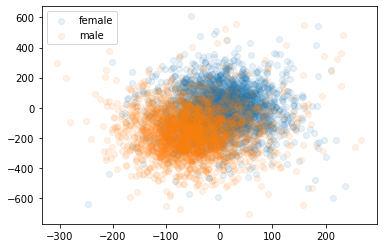

In [24]:

plt.scatter(female_df.f1_diff, female_df.f2_diff, alpha=0.1, label='female')
plt.scatter(male_df.f1_diff, male_df.f2_diff, alpha=0.1, label='male')
plt.legend()
# plt.hist(mdf.intonation, bins=100, alpha=0.3)
# plt.hist(fdf.intonation, bins=100, alpha=0.3)
plt.show()